Google Colab Notebook link:
https://colab.research.google.com/drive/163KmRIz6h5Wal1uz8-7Vo62-DuY8l56L?usp=sharing

# Enhancing Urban Parking Efficiency: A Comprehensive Analysis of NYC Parking Violation Insurances

# Executive Summary


From our analysis of parking ticket violations in New York City from 2021 to 2023, several key insights are highlighted: there are consistent trends and notable peaks during summer months, particularly August 2022. Monthly data shows an end-of-month surge in violations, while daily trends pinpoint 8 AM as a peak hour for ticketing, aligning with rush hour. "PHTO SCHOOL ZN SPEED VIOLATION" emerges as a frequent infraction, indicating the need for active speed enforcement in school zones. An analysis of vehicle-related data reveals that common vehicle colors, white, grey, and black and popular makes like Honda and Toyota are most ticketed, with newer vehicles more likely to receive tickets. Agency 'T' leads in ticket issuance, and vehicles from neighboring states, such as New Jersey and Pennsylvania, contribute significantly to NYC violations. The analysis also distinguishes between weekday and weekend patterns, emphasizing school zone speeding during weekdays. In relations with weather, the clear days experienced higher frequencies. The findings provide critical insights for developing targeted enforcement and public awareness campaigns to address traffic violations and enhance road safety in NYC, therefore supports policy decisions aimed at improving urban mobility and the quality of life for city residents by examining the intricate relationship between parking violations, enforcement practices, and external factors such as weather.

# 1.Problem Definition:

**Business Problems:**

This project seeks to delve into the NYC Department of Finance's parking violation data over the past 3 years, aiming to gain a comprehensive understanding of parking infractions in New York City. By doing so, we intend to provide valuable insights for policymakers and citizens alike.

The significance of addressing parking violations lies in its impact on urban mobility and the daily lives of citizens. Illegitimate parking can contribute to traffic congestion, safety concerns, and inconvenience for residents. Therefore, our research seeks to shed light on the patterns and factors contributing to parking violations, with the ultimate goal of informing effective policies and practices to enhance urban parking efficiency, making New York City a more livable and navigable space for everyone.

Further, combining with information from the violation detail dataset, and the weather data, we dive into the connections of parking violations, fine amount and weather data.

Our primary objectives include:

* Investigating the seasonality of parking violations to pinpoint periods of heightened violation activity.
* Examining vehicle attributes (make, year, body type) to uncover correlations with a higher likelihood of receiving parking tickets.
* Exploring the relationships between violation types and issuers, times, and vehicle characteristics.
* Investigating potential root causes of parking violations through analysing distribution pattern of violation codes as well as it's relationship with fine amount.
* Discover patterns in violation fine amount and relation to weather in New York City.

**Motivation:**
Our motivation stems from the prevalent issue of parking violations in metropolitans like New York City. By examining the patterns and factors influencing ticket issuance, we aim to contribute to improved parking management and provide valuable insights to inform policymakers and the public about a more efficient parking system.


# 2.Data and Its Source

**Data Description**

The NYC Department of Finance collects data on every parking ticket issued in NYC. This data is made publicly available to aid in ticket resolution and to guide policymakers.

 The parking violations datasets are roughly organized by fiscal year (begins on July 1st of one calendar year and ends on June 30th of the following calendar year). Columns include information about the vehicle ticketed, the ticket issued, location, and time.
 Further, the dataset of violation fine detail is publicly accessible from the same link.

 The data of weather is retrieved from National Oceanic and Atmospheric Administration's public data on weather stations located in New York City.

**Data Source**

The parking ticket data is managed by the Office of Technology and Innovation, provided by the NYC Department of Finance, the data from fiscal year 2021 to fiscal year 2023 is available on the NYC Open Data portal
[here](https://data.cityofnewyork.us/browse?q=Parking%20Violations%20Issued&sortBy=relevance).
The weather data of New York City is requested [here](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/locations/CITY:US360019/detail).


## 2.1 Entity Relations Diagram


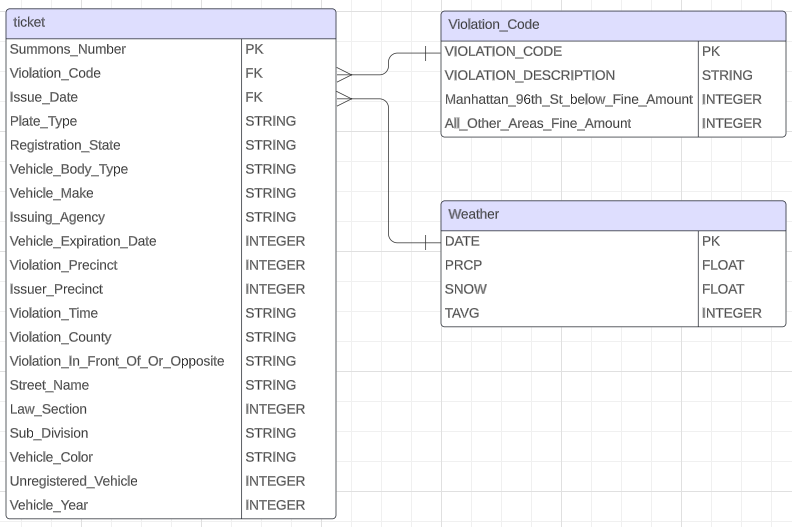

### **Description of ERD:**
 The above entity relations diagrams presents three tables: ticket, Violation_Code, and Weather_Data. The ticket table includes various fields related to parking violations, such as Summons_Number, Violation_Code, Plate_Type, Issue_Date, and many others related to the vehicle and the violation. The Violation_Code table contains the details of each violation, such as Violatio_Code, Violation_Description, and fine amounts for specific locations. The primary key of the ticket table is Summons Numbers. The Violation_Code is the foreign key in the ticket table. Lastly, the Weather table includes fields like Date, precipitaiton, snow, and average temperature, that we will later join with the ticket table using date.

# 3.Data Preparation

In [ ]:
from google.colab import auth
auth.authenticate_user()

After the initial scan of the dataset, we looked at the columns of interest for our analysis and ruled out the columns that were filled with null values. We selected 20 columns from the original 43 columns, that encompass the details of the violation location, time, and specifics involved, as well as vehicle information, and issuing agency-related information. The columns are listed below: Summons_Number, Registration_State, Plate_Type, Issue_Date, Violation_Code,Vehicle_Body_Type, Vehicle_Make, Issuing_Agency, Vehicle_Expiration_Date,Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County, Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division, Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year.



**Checking table details using 2023 as an example**

In [ ]:
%%bigquery --project=ba775-b08
SELECT
    Summons_Number, Registration_State, Plate_Type, Issue_Date, Violation_Code,
    Vehicle_Body_Type, Vehicle_Make, Issuing_Agency, Vehicle_Expiration_Date,
    Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County,
    Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division,
    Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year
FROM ba775-b08.nyc_ticket.2023;

Query is running:   0%|          |

Downloading:   0%|          |

,Summons_Number,Registration_State,Plate_Type,Issue_Date,Violation_Code,Vehicle_Body_Type,Vehicle_Make,Issuing_Agency,Vehicle_Expiration_Date,Violation_Precinct,Issuer_Precinct,Violation_Time,Violation_County,Violation_In_Front_Of_Or_Opposite,Street_Name,Law_Section,Sub_Division,Vehicle_Color,Unregistered_Vehicle_,Vehicle_Year
0,1484752314,NY,PAS,2022-06-08,20,SDN,TOYOT,K,20230530,40,2,0902A,BX,O,COLLEGE AVE,408,C,GREY,0,2017
1,1441872073,NY,PAS,2022-06-30,19,SUBN,JEEP,R,0,109,0,1031A,Q,F,NORTHERN BLVD,408,C,WT,0,0
2,1480631486,NY,PAS,2022-06-18,40,SUBN,INFIN,P,20231205,69,69,1235A,None,O,RALPH AVE,408,F1,SIL,0,2012
3,1448560603,CT,PAS,2022-06-17,21,SDN,None,P,20221117,0,0,1114A,NY,F,W 55,408,C3,GY,0,2009
4,1481166359,NY,PAS,2022-07-06,70,SUBN,SUBAR,T,20220601,43,0,1150A,BX,F,PURDY ST,408,E2,GY,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21563497,4857769876,NJ,PAS,2023-08-13,36,COUP,MERCU,V,0,0,0,0823P,BX,None,SB GRAND CONCOURSE @,1180,B,None,<NA>,2068
21563498,4857871646,NY,PAS,2023-08-16,36,4DSD,TOYOT,V,0,0,0,0758P,BK,None,WB SHORE PKWY @ KNAP,1180,B,TN,<NA>,2003
21563499,4857873680,NY,PAS,2023-08-16,36,4DSD,BMW,V,0,0,0,0842P,BX,None,EB ADEE AVE @ PEARSA,1180,B,GY,<NA>,2023
21563500,4857858540,NY,PAS,2023-08-16,36,SUBN,BMW,V,0,0,0,0445P,BK,None,EB 65TH ST @ 18TH AV,1180,B,BK,<NA>,2021


**Union tables from fiscal year 2021 to 2023**

In [ ]:
%%bigquery --project=ba775-b08
CREATE OR REPLACE TABLE ba775-b08.nyc_ticket.ticket AS
SELECT
    Summons_Number, Registration_State, Plate_Type, Issue_Date, Violation_Code,
    Vehicle_Body_Type, Vehicle_Make, Issuing_Agency, Vehicle_Expiration_Date,
    Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County,
    Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division,
    Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year
FROM
(
    SELECT Summons_Number, Registration_State, Plate_Type,Issue_Date, Violation_Code, Vehicle_Body_Type, Vehicle_Make, Issuing_Agency,Vehicle_Expiration_Date, Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County, Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division, Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year
    FROM ba775-b08.nyc_ticket.2021
    UNION ALL
    SELECT Summons_Number, Registration_State, Plate_Type,Issue_Date, Violation_Code, Vehicle_Body_Type, Vehicle_Make, Issuing_Agency,Vehicle_Expiration_Date, Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County, Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division, Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year
    FROM ba775-b08.nyc_ticket.2022
    UNION ALL
    SELECT Summons_Number, Registration_State, Plate_Type,Issue_Date, Violation_Code, Vehicle_Body_Type, Vehicle_Make, Issuing_Agency,Vehicle_Expiration_Date, Violation_Precinct, Issuer_Precinct, Violation_Time, Violation_County, Violation_In_Front_Of_Or_Opposite, Street_Name, Law_Section, Sub_Division, Vehicle_Color, Unregistered_Vehicle_, Vehicle_Year
    FROM ba775-b08.nyc_ticket.2023
)
WHERE EXTRACT(YEAR FROM Issue_Date) IN (2021, 2022, 2023);


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b08
SELECT
  (COUNTIF(Summons_Number IS NULL) / COUNT(*)) AS Column1_Null_Proportion,
  (COUNTIF(Registration_State IS NULL) / COUNT(*)) AS Column2_Null_Proportion,
  (COUNTIF(Plate_Type IS NULL) / COUNT(*)) AS Column3_Null_Proportion,
  (COUNTIF(Issue_Date IS NULL) / COUNT(*)) AS Column4_Null_Proportion,
  (COUNTIF(Violation_Code IS NULL) / COUNT(*)) AS Column5_Null_Proportion,
  (COUNTIF(Vehicle_Body_Type IS NULL) / COUNT(*)) AS Column6_Null_Proportion,
  (COUNTIF(Vehicle_Make IS NULL) / COUNT(*)) AS Column7_Null_Proportion,
  (COUNTIF(Issuing_Agency IS NULL) / COUNT(*)) AS Column8_Null_Proportion,
  (COUNTIF(Vehicle_Expiration_Date IS NULL) / COUNT(*)) AS Column9_Null_Proportion,
  (COUNTIF(Violation_Precinct IS NULL) / COUNT(*)) AS Column10_Null_Proportion,
  (COUNTIF(Issuer_Precinct IS NULL) / COUNT(*)) AS Column11_Null_Proportion,
  (COUNTIF(Violation_Time IS NULL) / COUNT(*)) AS Column12_Null_Proportion,
  (COUNTIF(Violation_County IS NULL) / COUNT(*)) AS Column13_Null_Proportion,
  (COUNTIF(Violation_In_Front_Of_Or_Opposite IS NULL) / COUNT(*)) AS Column14_Null_Proportion,
  (COUNTIF(Street_Name IS NULL) / COUNT(*)) AS Column15_Null_Proportion,
  (COUNTIF(Law_Section IS NULL) / COUNT(*)) AS Column16_Null_Proportion,
  (COUNTIF(Sub_Division IS NULL) / COUNT(*)) AS Column17_Null_Proportion,
  (COUNTIF(Vehicle_Color IS NULL) / COUNT(*)) AS Column18_Null_Proportion,
  (COUNTIF(Unregistered_Vehicle_ IS NULL) / COUNT(*)) AS Column19_Null_Proportion,
  (COUNTIF(Vehicle_Year IS NULL) / COUNT(*)) AS Column20_Null_Proportion
FROM
  `ba775-b08.nyc_ticket.ticket`;

Query is running:   0%|          |

Downloading:   0%|          |

,Column1_Null_Proportion,Column2_Null_Proportion,Column3_Null_Proportion,Column4_Null_Proportion,Column5_Null_Proportion,Column6_Null_Proportion,Column7_Null_Proportion,Column8_Null_Proportion,Column9_Null_Proportion,Column10_Null_Proportion,Column11_Null_Proportion,Column12_Null_Proportion,Column13_Null_Proportion,Column14_Null_Proportion,Column15_Null_Proportion,Column16_Null_Proportion,Column17_Null_Proportion,Column18_Null_Proportion,Column19_Null_Proportion,Column20_Null_Proportion
0,0.0,0.0,0.0,0.0,0.0,0.002324,0.000968,0.0,0.0,0.0,0.0,0.000012,0.004107,0.416307,0.000106,0.0,0.000145,0.076096,0.977601,0.0


After checking the proportion of null values for each column, we noticed some columns with a High Percentage of Null Values (e.g., Column14_Null_Proportion, Column19_Null_Proportion).

Only a few columns have substantial proportions of null values (41.6% and 97.76% for 14 and 19, respectively). We can infer that immediate removal might lead to a loss of valuable data and potentially shallow important patterns that could be crucial for a comprehensive analysis, for example, calling a WHERE IS NOT NULL clause on Column 19 will stop us from accessing lines that contain Null in column 19 but valid data in other columns. This could severely bias any analysis and lead to incorrect conclusions.

Therefore, we will clean the relevant columns in each question if needed.

**Table 1 *Ticket* Overview**

|Index| Feature           | Description |
|:----------------| :---------------- | :--------|
|1|Summons_Number|Unique Identifier of summons|
|2|Registration_State| State of plate registration|    
|3|Plate_Type| Type of plate|
|4|Issue_Date| Issue date|
|5|Violation_Code| Type of violation|
|6|Vehicle_Body_Type| Vehicle body type written on summons|
|7|Vehicle_Make| Make of car written on summons|
|8|Issuing_Agency| Issuing Agency Code|
|9|Vehicle_Expiration_Date| Vehicle expiration date on summons|
|10|Violation_Precinct| Precinct of violation|
|11|Issuer_Precinct| Precinct of issuance|
|12|Violation_Time| Time violation occurred|
|13|Violation_County| County of violation|
|14|Violation_In_Front_Of_Or_Opposite| Violation in front of or opposite|
|15|Street_Name| Street name of summons issued|
|16|Law_Section| Section of Vehicle &traffic law|
|17|Sub_Division| Sub division on summons image|
|18|Vehicle_Color| Car color written on summons|
|19|Unregistered_Vehicle_| Unregistered Vehicle indicator|
|20|Vehicle_Year| Year of Vehicle written on summons|

**Table 2 Description**

Along with the parking violation dataset, we find the violation detail table that each violation type corresponds with a fine amount. Therefore, we can join the two tables for further calculation in terms of the specific fine amount if needed.


In [ ]:
%%bigquery --project=ba775-b08
SELECT *
FROM ba775-b08.nyc_ticket.Violation_Code
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,VIOLATION_CODE,VIOLATION_DESCRIPTION,Manhattan__96th_St____below__Fine_Amount___,All_Other_Areas__Fine_Amount___
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515
3,4,BUS PARKING IN LOWER MANHATTAN,115,115
4,5,BUS LANE VIOLATION,50,50
5,6,OVERNIGHT TRACTOR TRAILER PKG,265,265
6,7,FAILURE TO STOP AT RED LIGHT,50,50
7,8,IDLING,115,115
8,9,OBSTRUCTING TRAFFIC/INTERSECT,115,115
9,10,NO STOPPING-DAY/TIME LIMITS,115,115


**Table 2 *Violation_Code* Overview**

|Index| Feature           | Description |
|:----------------| :---------------- | :--------|
|1|Violation Code|Type of violation|
|2|Violation Description| Description of each type of violation|
|3|Manhattan  96th St. & below (Fine Amount)|Fine amount for Manhattan 96th St. & below |
|4|All Other Areas (Fine Amount)| Fine amount for all other areas|

**Table 3 Weather Description**

To delve into the relationship between number of violations to weather, we retrieved weather data of the station located in New York Cityfrom the NOAA.  We later join the weather data to violation details to count the number of violations under different weather.

In [ ]:
%%bigquery --project=ba775-b08
SELECT *
FROM ba775-b08.nyc_ticket.weather
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,DATE,PRCP,SNOW,TAVG
0,2021-03-02,0.00,NaN,<NA>
1,2021-03-02,0.00,NaN,<NA>
2,2021-03-02,0.02,NaN,<NA>
3,2021-03-02,0.00,NaN,<NA>
4,2021-03-02,0.00,NaN,<NA>
5,2021-03-02,0.01,NaN,<NA>
6,2021-03-02,0.02,NaN,<NA>
7,2021-03-02,0.01,NaN,<NA>
8,2021-03-02,0.02,NaN,<NA>
9,2021-03-02,0.00,NaN,<NA>


**Table 3 *Weather* Overview**

|Index| Feature           | Description |
|:----------------| :---------------- | :--------|
|1|Date|Date of observation|
|2|Prcp|Amount of precipitation recorded|
|3|Snow|Amount of snow recorded|
|4|TAVG|Average Temperature|

# 4.Data Exploration

## 4.1: What is the trend of parking violations on the scope of time?

### a. What are the trends of parking ticket violation over the three years?

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  EXTRACT(YEAR FROM Issue_Date) AS Year,
  COUNT(*) AS Total_Tickets
FROM ba775-b08.nyc_ticket.ticket
GROUP BY Year
ORDER BY Year;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Total_Tickets
0,2021,15006541
1,2022,16526643
2,2023,12407055


In [ ]:
%%bigquery --project=ba775-b08
SELECT
 EXTRACT(MONTH FROM Issue_Date) AS month,
 COUNT(CASE WHEN EXTRACT(YEAR FROM Issue_Date) = 2021 THEN 1 END) AS year_2021,
 COUNT(CASE WHEN EXTRACT(YEAR FROM Issue_Date) = 2022 THEN 1 END) AS year_2022,
 COUNT(CASE WHEN EXTRACT(YEAR FROM Issue_Date) = 2023 THEN 1 END) AS year_2023,
FROM ba775-b08.nyc_ticket.ticket
GROUP BY month
ORDER BY month;

Query is running:   0%|          |

Downloading:   0%|          |

,month,year_2021,year_2022,year_2023
0,1,1256440,1079265,1346928
1,2,717811,1097721,1279923
2,3,1371296,1391232,1519940
3,4,1207182,1331274,1387986
4,5,1198537,1348967,1513422
5,6,1444092,1429046,1349003
6,7,1404527,1354990,1508795
7,8,1419839,1770847,1485247
8,9,1191131,1491141,1015351
9,10,1346841,1520790,136



The data here reveals the trends in parking ticket violations over three years—2021, 2022, and 2023. The total parking violations issued for each of the three years are very similar, with 2022 topping with 16526643 violations, and 2021's 15006541 violations. One thing to note is that because the fiscal year of 2023 is still ongoing, the latter half of the year 2023 data is incomplete.

In 2021, the numbers start high in January with 1,256,440 violations and show variation throughout the year, with the lowest in December at 1,164,287. The year 2022 exhibits an overall increase, starting with 1,079,265 in January, and reaching a peak in August with 1,770,847 violations.

The factors affecting the variations remain unknown at this point.

### b. Which months have the highest violations? Are there seasonalities involved?

In [ ]:
%%bigquery --project=ba775-b08
--Create a table with all the infomation needed to answer the question
CREATE OR REPLACE TABLE ba775-b08.nyc_ticket.seasonality_fine AS
SELECT
t.Issue_date,
t.Violation_Code,
EXTRACT(YEAR FROM t.Issue_Date) AS P_Year,
EXTRACT(MONTH FROM t.Issue_Date) AS P_Month,
CASE WHEN EXTRACT(DAY FROM t.Issue_Date) BETWEEN 1 AND 10 THEN 'Early_Month' --Identify the Month Section a ticket being issued
      WHEN EXTRACT(DAY FROM t.Issue_Date) BETWEEN 11 AND 20 THEN 'Mid_Month'
      ELSE 'Late_Month'
END AS Month_Section,
CASE WHEN EXTRACT(MONTH FROM t.Issue_Date) IN (3, 4, 5) Then 'Spring'  --Identify the Season a ticket being issued
       WHEN EXTRACT(MONTH FROM t.Issue_Date) IN (6, 7, 8) THEN 'Summer'
       WHEN EXTRACT(MONTH FROM t.Issue_Date) IN (9, 10, 11) THEN 'Fall'
       ELSE 'Winter'
END AS Season,
V.VIOLATION_DESCRIPTION AS Description,
V.Manhattan__96th_St____below__Fine_Amount___ AS Manhattan_Fine,
V.All_Other_Areas__Fine_Amount___ AS Other_Fine
FROM ba775-b08.nyc_ticket.ticket AS t
LEFT JOIN ba775-b08.nyc_ticket.Violation_Code AS V
ON t.Violation_Code = V.VIOLATION_CODE

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b08
--Sanity check on the table
SELECT *
FROM ba775-b08.nyc_ticket.seasonality_fine
LIMIT 100

Query is running:   0%|          |

Downloading:   0%|          |

,Issue_date,Violation_Code,P_Year,P_Month,Month_Section,Season,Description,Manhattan_Fine,Other_Fine
0,2023-04-20,0,2023,4,Mid_Month,Spring,None,<NA>,<NA>
1,2021-12-10,0,2021,12,Early_Month,Winter,None,<NA>,<NA>
2,2022-08-24,0,2022,8,Late_Month,Summer,None,<NA>,<NA>
3,2022-09-01,0,2022,9,Early_Month,Fall,None,<NA>,<NA>
4,2023-05-19,0,2023,5,Mid_Month,Spring,None,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...
95,2021-01-17,4,2021,1,Mid_Month,Winter,BUS PARKING IN LOWER MANHATTAN,115,115
96,2022-06-14,4,2022,6,Mid_Month,Summer,BUS PARKING IN LOWER MANHATTAN,115,115
97,2021-01-27,4,2021,1,Late_Month,Winter,BUS PARKING IN LOWER MANHATTAN,115,115
98,2021-10-10,4,2021,10,Early_Month,Fall,BUS PARKING IN LOWER MANHATTAN,115,115


In [ ]:
%%bigquery --project=ba775-b08
--Count tickets being issued based on Month Section and Season
SELECT P_Year, Season, P_Month, Month_Section, COUNT(*) AS Violation_Month_Section_Spread,
FROM ba775-b08.nyc_ticket.seasonality_fine
WHERE P_Year BETWEEN 2021 AND 2023
GROUP BY P_Year, P_Month, Month_Section, Season
ORDER BY Violation_Month_Section_Spread DESC, P_Year
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,P_Year,Season,P_Month,Month_Section,Violation_Month_Section_Spread
0,2022,Summer,8,Late_Month,604312
1,2022,Summer,8,Early_Month,596370
2,2022,Summer,8,Mid_Month,570165
3,2023,Spring,3,Late_Month,555860
4,2022,Fall,10,Late_Month,546094
5,2023,Summer,8,Late_Month,541579
6,2022,Spring,3,Late_Month,536957
7,2021,Summer,7,Late_Month,533965
8,2023,Summer,7,Late_Month,530149
9,2022,Fall,10,Mid_Month,529183


The data here indicates the spread of parking violations across different months and seasons within the year 2021-2023. The highest number of violations occurred in the summer of 2022, particularly in the late month of August (604,312 violations), which suggests a seasonal peak in parking violations. It's followed closely by the early and mid-month of August with 596,370 and 570,165 violations, respectively. Fall months also show a high count, especially in the late month of October and mid-month of October with 546,094 and 529,183 violations, respectively. The data for Spring shows a lesser count of violations in late March with 536,957. This data can be indicative of a pattern where parking violations tend to increase during specific times of the year, possibly due to increased outdoor activities and tourism during the summer.
<br><br>
Besides traveling and citizen-activity factors, we also noticed a pattern in time in a month. In the top 10 records, "Late Month" showed 7 times, and was across four seasons. Though the topic of "issuing more tickets at the end of the month" has been treated as a rumor according to the administration, in our dataset, this anecdote somehow gets testified and proved valid to some degree.<br><br>
However, though "Summer" and "Late Month" are the peak time of tickets being issued, does that mean more fines being collected by NYPD? We than dived into calculation of fine based on Month Section and Seasonality.

In [ ]:
%%bigquery --project=ba775-b08
--Calculated the overall fine per each Month Section of each Month of each Year
WITH Month_Section_Fine AS (
SELECT
P_Year,
Season,
P_Month,
Month_Section,
SUM(Manhattan_Fine + Other_Fine) OVER (PARTITION BY P_Year, P_Month, Month_Section)/2 AS Total_MS_Fines
FROM
ba775-b08.nyc_ticket.seasonality_fine
WHERE Violation_Code IS NOT NULL
)

SELECT DISTINCT
--The subquery above will return for all lines and bring duplicated, ChatGPT helped with the following query code to filter and show only the distinct results
P_Year,
Season,
P_Month,
Month_Section,
FIRST_VALUE(Total_MS_Fines) OVER (PARTITION BY P_Year, P_Month, Month_Section ORDER BY P_Year, P_Month, Month_Section) AS Total_Fines_Per_Month_Section
FROM Month_Section_Fine
ORDER BY Total_Fines_Per_Month_Section DESC

Query is running:   0%|          |

Downloading:   0%|          |

,P_Year,Season,P_Month,Month_Section,Total_Fines_Per_Month_Section
0,2022,Summer,8,Late_Month,38111160.0
1,2022,Summer,8,Early_Month,37624990.0
2,2023,Spring,3,Late_Month,37121532.5
3,2022,Spring,3,Late_Month,37037857.5
4,2021,Summer,7,Late_Month,36075322.5
...,...,...,...,...,...
103,2023,Fall,11,Mid_Month,4875.0
104,2023,Fall,11,Early_Month,4355.0
105,2023,Winter,12,Late_Month,4227.5
106,2023,Fall,10,Mid_Month,3380.0


In [ ]:
%%bigquery --project=ba775-b08
--Calculated the overall fine per Season of each Year
WITH Season_Fine AS (
SELECT
P_Year,
Season,
SUM(Manhattan_Fine + Other_Fine) OVER (PARTITION BY P_Year, Season)/2 AS Total_Season_Fines
FROM
ba775-b08.nyc_ticket.seasonality_fine
WHERE Violation_Code IS NOT NULL
)

SELECT DISTINCT
--The subquery above will return for all lines and bring duplicated, ChatGPT helped with the following query code to filter and show only the distinct results
P_Year,
Season,
FIRST_VALUE(Total_Season_Fines) OVER (PARTITION BY P_Year, Season ORDER BY P_Year, Season) AS Total_Fines_Per_Season
FROM Season_Fine
ORDER BY Total_Fines_Per_Season DESC

Query is running:   0%|          |

Downloading:   0%|          |

,P_Year,Season,Total_Fines_Per_Season
0,2022,Summer,297949895.0
1,2021,Summer,291774677.5
2,2023,Spring,291428052.5
3,2022,Fall,288168762.5
4,2022,Spring,280177740.0
5,2023,Summer,276955405.0
6,2021,Spring,264906602.5
7,2021,Fall,260573152.5
8,2022,Winter,227446617.5
9,2021,Winter,216587165.0


Echoing the initial observation of seasonality and hot-month-section, "Late Month" is dominating the top range of the list, revealing that since more tickets are being issued during the end of months, more fines are being collected through these violation attempts. <br><br>
As for seasonal fines, "Summer" indeed generated the most fines in 2021 and 2022 to the NYPD income, we can infer there will be a good chance in the future that Summer will continue to be the time which will have the most violations along with most punishments. <br><br>
Noticeably, even though Summer has the highest number of fine amounts, the differences in amount across Spring, Summer and Fall are not too significant, meaning traffic violation is already a rooted problem within the city that might need administrative attention to alleviate or fix. This should also heighten drivers for their interest, in driving and parking carefully when in NYC, especially during the end of the month and Summer time.

### c. What times of the day experience the  Highest Occurrences of Parking Violations?

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  Hour,
  COUNT(*) AS Violations_Count
FROM (
  SELECT
    CASE
      WHEN RIGHT(Violation_Time, 1) = 'A' THEN EXTRACT(HOUR FROM SAFE.PARSE_DATETIME('%I%M%p', LEFT(Violation_Time, LENGTH(Violation_Time) - 1) || 'AM'))
      WHEN RIGHT(Violation_Time, 1) = 'P' THEN EXTRACT(HOUR FROM SAFE.PARSE_DATETIME('%I%M%p', LEFT(Violation_Time, LENGTH(Violation_Time) - 1) || 'PM'))
      ELSE NULL
    END AS Hour
  FROM ba775-b08.nyc_ticket.ticket
  WHERE Violation_Time IS NOT NULL
)
GROUP BY Hour
ORDER BY Violations_Count DESC
LIMIT 24;

Query is running:   0%|          |

Downloading:   0%|          |

,Hour,Violations_Count
0,8,3937991
1,11,3926938
2,9,3909481
3,12,3646460
4,13,3641327
5,10,3259864
6,14,3223219
7,7,2660034
8,15,2618333
9,16,2129169


The highest number of violations occurs at 8 AM (3,937,991 violations), suggesting that this may be a peak time for enforcement, possibly due to restricted parking rules coming into effect during rush hour. The counts remain high from midnight to early morning, with over 3.9 million violations at 11 PM and 9 AM, decreasing steadily through the day. The fewest violations occur in the late evening, with the lowest at 4 AM (242,341 violations), which could reflect lesser enforcement activity or reduced parking restrictions during these hours.

### d. During different hours of the day, which violation types stand out?

In [ ]:
%%bigquery --project=ba775-b08
WITH HourlyViolations AS (
 SELECT
   CASE
     WHEN RIGHT(Violation_Time, 1) = 'A' THEN EXTRACT(HOUR FROM SAFE.PARSE_DATETIME('%I%M%p', LEFT(Violation_Time, LENGTH(Violation_Time) - 1) || 'AM'))
     WHEN RIGHT(Violation_Time, 1) = 'P' THEN EXTRACT(HOUR FROM SAFE.PARSE_DATETIME('%I%M%p', LEFT(Violation_Time, LENGTH(Violation_Time) - 1) || 'PM'))
     ELSE NULL
   END AS Hour,
   Violation_Code,
   COUNT(*) AS Violations_Count
 FROM ba775-b08.nyc_ticket.ticket
 WHERE Violation_Time IS NOT NULL
 GROUP BY Hour, Violation_Code
),
RankedViolations AS (
 SELECT
   HV.Hour,
   HV.Violation_Code,
   VC.VIOLATION_DESCRIPTION,
   HV.Violations_Count,
   DENSE_RANK() OVER (PARTITION BY HV.Hour ORDER BY HV.Violations_Count DESC) AS Rank
 FROM HourlyViolations HV
 JOIN ba775-b08.nyc_ticket.Violation_Code VC
   ON HV.Violation_Code = VC.VIOLATION_CODE
)
SELECT
 Hour,
 MAX(IF(Rank = 1, Violation_Code, NULL)) AS Top1_Violation_Code,
 MAX(IF(Rank = 1, VIOLATION_DESCRIPTION, NULL)) AS Top1_Violation_Description,
 MAX(IF(Rank = 1, Violations_Count, NULL)) AS Top1_Violations_Count,
 MAX(IF(Rank = 2, Violation_Code, NULL)) AS Top2_Violation_Code,
 MAX(IF(Rank = 2, VIOLATION_DESCRIPTION, NULL)) AS Top2_Violation_Description,
 MAX(IF(Rank = 2, Violations_Count, NULL)) AS Top2_Violations_Count,
 MAX(IF(Rank = 3, Violation_Code, NULL)) AS Top3_Violation_Code,
 MAX(IF(Rank = 3, VIOLATION_DESCRIPTION, NULL)) AS Top3_Violation_Description,
 MAX(IF(Rank = 3, Violations_Count, NULL)) AS Top3_Violations_Count
FROM RankedViolations
GROUP BY Hour
ORDER BY Hour DESC
LIMIT 24;

Query is running:   0%|          |

Downloading:   0%|          |

,Hour,Top1_Violation_Code,Top1_Violation_Description,Top1_Violations_Count,Top2_Violation_Code,Top2_Violation_Description,Top2_Violations_Count,Top3_Violation_Code,Top3_Violation_Description,Top3_Violations_Count
0,23,36,PHTO SCHOOL ZN SPEED VIOLATION,277383,7,FAILURE TO STOP AT RED LIGHT,43555,40,FIRE HYDRANT,27351
1,22,36,PHTO SCHOOL ZN SPEED VIOLATION,276636,7,FAILURE TO STOP AT RED LIGHT,50834,40,FIRE HYDRANT,41147
2,21,36,PHTO SCHOOL ZN SPEED VIOLATION,626367,7,FAILURE TO STOP AT RED LIGHT,55580,5,BUS LANE VIOLATION,51222
3,20,36,PHTO SCHOOL ZN SPEED VIOLATION,644102,38,FAIL TO DSPLY MUNI METER RECPT,67252,7,FAILURE TO STOP AT RED LIGHT,63744
4,19,36,PHTO SCHOOL ZN SPEED VIOLATION,738888,5,BUS LANE VIOLATION,83154,7,FAILURE TO STOP AT RED LIGHT,77225
5,18,36,PHTO SCHOOL ZN SPEED VIOLATION,780495,5,BUS LANE VIOLATION,146840,7,FAILURE TO STOP AT RED LIGHT,97758
6,17,36,PHTO SCHOOL ZN SPEED VIOLATION,794404,5,BUS LANE VIOLATION,154467,38,FAIL TO DSPLY MUNI METER RECPT,127903
7,16,36,PHTO SCHOOL ZN SPEED VIOLATION,876703,14,NO STANDING-DAY/TIME LIMITS,164207,38,FAIL TO DSPLY MUNI METER RECPT,164065
8,15,36,PHTO SCHOOL ZN SPEED VIOLATION,935813,38,FAIL TO DSPLY MUNI METER RECPT,241310,14,NO STANDING-DAY/TIME LIMITS,143982
9,14,36,PHTO SCHOOL ZN SPEED VIOLATION,925993,38,FAIL TO DSPLY MUNI METER RECPT,338841,14,NO STANDING-DAY/TIME LIMITS,202093


The most common violation throughout the majority of the day is "PHTO SCHOOL ZN SPEED VIOLATION," indicating a significant incidence of speeding in school zones. This suggests that drivers are frequently exceeding speed limits near schools, which could be a significant safety concern.

The consistency of "PHTO SCHOOL ZN SPEED VIOLATION" as a top violation across almost all hours may also indicate the presence of automated speed enforcement in school zones, such as speed cameras, which work continuously throughout the day.

During the late night and early morning hours (from 23:00 to 05:00), there is a notable number of "NO PARKING-STREET CLEANING" violations, which may correspond to scheduled street cleaning times. It appears that vehicles are parked during restricted hours for street cleaning, leading to these violations.

From early to mid-morning hours (06:00 to 10:00), we observe "FAILURE TO STOP AT RED LIGHT" and "BUS LANE VIOLATION" types becoming more prevalent, potentially indicating morning rush hour behaviors where drivers may be more likely to commit these infractions in an effort to hasten their commute.
"FIRE HYDRANT" violations tend to appear among the top three violations predominantly in the early morning (06:00) and late evening hours (20:00 and 21:00), which could suggest that drivers take more liberties with parking regulations outside of regular business hours.

In conclusion, certain violation types are clearly more prominent during specific times of the day. Speeding in school zones is a persistent issue, while violations like parking during street cleaning, failing to stop at red lights, and bus lane violations exhibit more time-specific patterns that correlate with routine urban dynamics such as rush hours and cleaning schedules. These insights can inform targeted enforcement and public awareness campaigns to improve compliance and safety.

### e. Which are the top violation types for each day of a week? Are there differences in terms of top violation types for weekdays vs. weekeends?

In [ ]:
%%bigquery --project=ba775-b08
-- Top 3 violation type for each day of week
WITH DailyViolations AS (
 SELECT
   EXTRACT(DAYOFWEEK FROM Issue_Date) AS DayOfWeek,
   Violation_Code,
   COUNT(*) AS Violations_Count
 FROM `ba775-b08.nyc_ticket.ticket`
 GROUP BY DayOfWeek, Violation_Code
),
DailyRankedViolations AS (
 SELECT
   DayOfWeek,
   Violation_Code,
   Violations_Count,
   ROW_NUMBER() OVER (PARTITION BY DayOfWeek ORDER BY Violations_Count DESC) AS rn
 FROM DailyViolations
)
SELECT
 dr.DayOfWeek,
 dr.Violation_Code,
 vc.VIOLATION_DESCRIPTION,
 dr.Violations_Count
FROM DailyRankedViolations dr
JOIN `ba775-b08.nyc_ticket.Violation_Code` vc ON dr.Violation_Code = vc.VIOLATION_CODE
WHERE dr.rn <= 3
ORDER BY dr.DayOfWeek, dr.rn;

Query is running:   0%|          |

Downloading:   0%|          |

,DayOfWeek,Violation_Code,VIOLATION_DESCRIPTION,Violations_Count
0,1,36,PHTO SCHOOL ZN SPEED VIOLATION,1453657
1,1,7,FAILURE TO STOP AT RED LIGHT,254907
2,1,5,BUS LANE VIOLATION,169228
3,2,36,PHTO SCHOOL ZN SPEED VIOLATION,2330321
4,2,21,NO PARKING-STREET CLEANING,681969
5,2,38,FAIL TO DSPLY MUNI METER RECPT,449141
6,3,36,PHTO SCHOOL ZN SPEED VIOLATION,2326101
7,3,21,NO PARKING-STREET CLEANING,898348
8,3,38,FAIL TO DSPLY MUNI METER RECPT,524889
9,4,36,PHTO SCHOOL ZN SPEED VIOLATION,2333052


**PHTO SCHOOL ZN SPEED VIOLATION:**

Weekdays: This violation type is consistently at the top across all weekdays, which is understandable given that school zone speed limits are typically enforced on school days.

Weekends: While still present, the count of school zone speed violations drops during the weekend, which may reflect the reduced presence of school activities and enforcement during these days.

**NO PARKING-STREET CLEANING:**

Weekdays: Appears as a top violation, particularly on days 2, 3, and 4, which could correspond to scheduled street cleaning days in various neighborhoods.

Weekends: This type of violation is not listed among the top violations for weekends, suggesting that street cleaning regulations may not be enforced or are less prevalent during these days.

FAILURE TO DISPLAY MUNI METER RECEIPT (FAIL TO DSPLY MUNI METER RECPT):

Weekdays: This is a common violation during weekdays, indicating that parking enforcement and the requirement to display parking receipts are in regular operation.

Weekends: It is still a top violation on the weekends, which may imply that parking regulations are still enforced during these days or that the volume of vehicles parking and thus potentially violating is high.

**FAILURE TO STOP AT RED LIGHT:**

Weekdays: This appears as a top violation on day 1, which might be indicative of busier traffic and more active enforcement on this particular weekday.

Weekends: It does not appear in the top violations for weekends, possibly due to reduced traffic or less enforcement activity.

FIRE HYDRANT:

Weekends: Notably, parking in front of a fire hydrant enters the top violations specifically on day 7, suggesting that drivers may take more liberties with parking regulations on the last day of the weekend or that enforcement is particularly attentive to this violation on this day.

In conclusion, there are distinct differences in the types of parking violations that are most common on weekdays versus weekends. School zone speed violations dominate the weekdays, which aligns with school operational hours. Conversely, violations such as 'failure to stop at red light' and 'fire hydrant' appear more or less frequently depending on the day of the week, suggesting varying traffic patterns and enforcement priorities. This information could be used to guide enforcement strategies and public awareness campaigns to address specific violations more effectively on particular days.

## 4.2 Which issuing agency gave out the most number of tickets?

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  Issuing_Agency,
  COUNT(*) AS Tickets_Issued
FROM ba775-b08.nyc_ticket.ticket
GROUP BY Issuing_Agency
ORDER BY Tickets_Issued DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Issuing_Agency,Tickets_Issued
0,T,23653254
1,V,18087894
2,S,1313679
3,P,754378
4,K,44761
5,X,44571
6,3,5312
7,Y,5061
8,O,4007
9,A,3996


The dataset details the number of tickets issued by different agencies, identified by single-letter codes. Agency 'T' has issued the highest number of tickets, with a total of 23,653,254. This is significantly more than the agency with the second-highest number, 'V', which issued 18,087,894 tickets. All other agencies listed issued far fewer tickets, with 'S' issuing 1,313,679 tickets and 'P' issuing 754,378, descending to 'A', which issued the least with 3,996 tickets.

## 4.3 What is the breakdown of parking violations by vehicle color, make, year, and body type?

### a. Vehicle Color Breakdown

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  --Focus only on the top colors, excluding 'None'
  CASE
    WHEN UPPER(Vehicle_Color) IN ('WHITE', 'WH', 'WHT', 'WT','WHI','W','WHIT') THEN 'WHITE'
    WHEN UPPER(Vehicle_Color) IN ('BLACK', 'BLK', 'BK','B', 'BLAC') THEN 'BLACK'
    WHEN UPPER(Vehicle_Color) IN ('GRAY', 'GREY', 'GY', 'GRY','GR','G') THEN 'GRAY'
    WHEN UPPER(Vehicle_Color) IN ('BLUE', 'BL','BLU') THEN 'BLUE'
    WHEN UPPER(Vehicle_Color) IN ('RED', 'RD') THEN 'RED'
    WHEN UPPER(Vehicle_Color) IN ('GREEN', 'GRN', 'GN') THEN 'GREEN'
    WHEN UPPER(Vehicle_Color) IN ('SILVE','SIL','SILV','SL','SILVR','SLV') THEN 'SILVER'
    WHEN UPPER(Vehicle_Color) IN ('YELLOW','YELLO','YW','YELL', 'YEL') THEN 'YELLOW'
    WHEN UPPER(Vehicle_Color) IN ('BROWN','BRN','BRO','BN','BRW','BR') THEN 'BROWN'
    WHEN UPPER(Vehicle_Color) IN ('TAN', 'TN') THEN 'TAN'
    ELSE UPPER(Vehicle_Color) -- For colors without abbreviations or that do not need to be combined
  END AS Standardized_Color,
  COUNT(*) AS Violations_Count
FROM ba775-b08.nyc_ticket.ticket
WHERE UPPER(Vehicle_Color) NOT IN ('NONE', '') -- Exclude 'None' and empty strings
GROUP BY Standardized_Color
ORDER BY Violations_Count DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,Standardized_Color,Violations_Count
0,WHITE,10937400
1,GRAY,10639961
2,BLACK,9575662
3,BLUE,3593716
4,RED,2158001
5,BROWN,939369
6,SILVER,765071
7,TAN,390603
8,YELLOW,322126
9,OTHER,172817


### b. Vehicle Make Breakdown

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  Vehicle_Make,
  COUNT(*) AS Violations_Count
FROM ba775-b08.nyc_ticket.ticket
GROUP BY Vehicle_Make
ORDER BY Violations_Count DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Vehicle_Make,Violations_Count
0,HONDA,5271218
1,TOYOT,4927918
2,FORD,4112476
3,NISSA,3710595
4,CHEVR,2351636
5,ME/BE,2196192
6,BMW,2176675
7,JEEP,1969835
8,HYUND,1377934
9,DODGE,1140602


### c. Vehicle Age Breakdown

In [ ]:
%%bigquery --project=ba775-b08

SELECT
    Vehicle_Age,
    COUNT(*) as Violations_Count
FROM (
    SELECT
        EXTRACT(YEAR FROM Issue_Date) - Vehicle_Year as Vehicle_Age,
        Summons_Number,
        Issue_Date,
        Violation_Code
    FROM
        ba775-b08.nyc_ticket.ticket
    WHERE
        Vehicle_Year IS NOT NULL AND
        Vehicle_Year > 0 AND
        Issue_Date IS NOT NULL AND
        EXTRACT(YEAR FROM Issue_Date) >= Vehicle_Year AND
        Vehicle_Year <> 0
)
GROUP BY
    Vehicle_Age
ORDER BY
    Violations_Count DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Vehicle_Age,Violations_Count
0,1,3770736
1,2,3732330
2,3,3292120
3,4,3005144
4,5,2560057
5,0,2286335
6,6,2275992
7,7,1937798
8,8,1721036
9,9,1476541


### d. Vehicle body type breakdown

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  CASE
    WHEN UPPER(Vehicle_Body_Type) IN ('4DSD', '2DSD', 'SDN', 'SD', '4D') THEN 'Sedan'
    ELSE UPPER(Vehicle_Body_Type)
  END as Vehicle_Body_Type,
  COUNT(*) AS Violations_Count
FROM `ba775-b08.nyc_ticket.ticket`
GROUP BY Vehicle_Body_Type
ORDER BY Violations_Count DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,Vehicle_Body_Type,Violations_Count
0,SUBN,18579392
1,Sedan,14647194
2,VAN,3670704
3,PICK,1257882
4,DELV,1140489
5,UT,1118422
6,REFG,349602
7,SW,334144
8,TRAC,310314
9,CONV,194518


The breakdown of parking violations by vehicle characteristics in NYC reveals distinct patterns:

**Vehicle Color**: White vehicles lead the count with over 10.9 million violations, closely followed by gray and black vehicles, which can be attributed to their popularity in vehicle color choice, making them more numerous and thus more likely to be ticketed. The high number of violations associated with these common vehicle colors may also be related to their visibility in urban settings.

**Vehicle Make:** Honda vehicles are at the top of the list with over 5 million violations, followed by Toyota and Ford. This is indicative of the popularity of these makes in the city. The prevalence of these brands on the roads could inherently increase the likelihood of receiving parking tickets.

**Vehicle Age:** In general, violations is inversely proportional to the age of vehicles. Newer vehicles, particularly those that are 1 to 2 years old, lead in violation counts, suggesting a higher propensity for newer vehicles to be involved in traffic infractions. This could be attributed to a variety of reasons, such as newer vehicles being driven more often or younger drivers, who may be more prone to risk-taking behaviors, preferring newer cars.

**Vehicle Body Type:** SUV and sedans top the list for violations by body type, suggesting that passenger cars are the most commonly ticketed. This is likely reflective of their dominance in the urban vehicle landscape. Pickup trucks and delivery vans (PICK and DELV) also feature prominently, which could be associated with commercial activities and parking challenges faced during loading and unloading in busy city areas.


The data reflects the interaction between vehicle prevalence in the city and parking enforcement patterns. It's important to note that the likelihood of getting a parking ticket is influenced not just by the type of vehicle, but also by factors such as parking behavior, the availability of legal parking spaces, enforcement policies, and the geographic distribution of parking spaces. Additionally, vehicles with no color listed as 'None' also show a substantial number of violations, indicating a possible issue with data collection or recording practices.

## 4.4 Are out-of-state license plates more prone to violations than in-state ones?


### a. In vs. Out-of-state license and total number of violations

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  Registration_State,
  COUNT(*) AS Tickets_Issued
FROM ba775-b08.nyc_ticket.ticket
GROUP BY Registration_State
ORDER BY Tickets_Issued DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Registration_State,Tickets_Issued
0,NY,32766213
1,NJ,4135650
2,PA,1470319
3,FL,947848
4,CT,723921
...,...,...
63,SK,73
64,PE,67
65,MX,7
66,NT,5


In [ ]:
%%bigquery --project=ba775-b08
SELECT
  CASE
    WHEN Registration_State = 'NY' THEN 'NY'
    ELSE 'Other States'
  END AS State_Category,
  COUNT(*) AS Tickets_Issued
FROM ba775-b08.nyc_ticket.ticket
GROUP BY State_Category
ORDER BY Tickets_Issued DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,State_Category,Tickets_Issued
0,NY,32766213
1,Other States,11174026


From this query result, we can notice that there were more than 50 states recorded, and a noticeable amount of violations were recorded with the state as "99", which is likely due to the lack of registration state at the time of record, hence the number is used as a place holder.

Besides NY, the top 10 highest number of violations states are New Jersey, Pennsylvania, Florida, Connecticut, Texas, Massachusetts, Maine, Virginia and Indiana. Among all the states, New Jersey, Pennsylvania, Connecticut, Massachusetts, Virginia, Indiana, and Maine are in the closer range to New York, which are likely due to the close proximity between the states and people driving into NY through their vehicles. Meanwhile, Florida and Texas are the only two states not close to New York yet presented a significant number of violations. Such an effect would possibly be attributed to the fact that most of the rental vehicles are registered in these two states for cheaper costs associated with them.

Overall, New York state-registered vehicles dominated the amount of parking violations issued in New York City.

### b. In vs. Out-of-state license and type of violations

In [ ]:
%%bigquery --project=ba775-b08
WITH RankedViolations AS (
  SELECT
    t.Registration_State,
    vc.VIOLATION_DESCRIPTION,
    CASE
      WHEN t.Registration_State = 'NY' THEN 'NY'
      ELSE 'Other States'
    END AS State_Category,
    t.Violation_Code,
    COUNT(*) AS Tickets_Issued,
    ROW_NUMBER() OVER (
      PARTITION BY
        CASE WHEN t.Registration_State = 'NY' THEN 'NY' ELSE 'Other States' END
      ORDER BY
        COUNT(*) DESC
    ) AS rn
  FROM
    ba775-b08.nyc_ticket.ticket t
  LEFT JOIN
    ba775-b08.nyc_ticket.Violation_Code vc
  ON
    t.Violation_Code = vc.VIOLATION_CODE
  GROUP BY
    t.Registration_State,
    vc.VIOLATION_DESCRIPTION,
    State_Category,
    t.Violation_Code
)
SELECT
  Registration_State,
  VIOLATION_DESCRIPTION,
  State_Category,
  Violation_Code,
  Tickets_Issued
FROM
  RankedViolations
WHERE
  rn <= 10
ORDER BY
  State_Category ASC,
  Tickets_Issued DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,Registration_State,VIOLATION_DESCRIPTION,State_Category,Violation_Code,Tickets_Issued
0,NY,PHTO SCHOOL ZN SPEED VIOLATION,NY,36,11243976
1,NY,NO PARKING-STREET CLEANING,NY,21,3493670
2,NY,FAIL TO DSPLY MUNI METER RECPT,NY,38,2180035
3,NY,INSP. STICKER-EXPIRED/MISSING,NY,71,1803354
4,NY,NO STANDING-DAY/TIME LIMITS,NY,14,1637880
5,NY,NO PARKING-DAY/TIME LIMITS,NY,20,1414794
6,NY,FAILURE TO STOP AT RED LIGHT,NY,7,1323911
7,NY,FIRE HYDRANT,NY,40,1271885
8,NY,REG. STICKER-EXPIRED/MISSING,NY,70,1213137
9,NY,BUS LANE VIOLATION,NY,5,1200334


In [ ]:
%%bigquery --project=ba775-b08
WITH StateViolations AS (
  SELECT
    CASE
      WHEN Registration_State = 'NY' THEN 'NY'
      ELSE 'Other States'
    END AS State_Category,
    vc.VIOLATION_DESCRIPTION,
    COUNT(*) AS Tickets_Issued
  FROM
    ba775-b08.nyc_ticket.ticket t
  LEFT JOIN
    ba775-b08.nyc_ticket.Violation_Code vc
  ON
    t.Violation_Code = vc.VIOLATION_CODE
  GROUP BY
    State_Category,
    vc.VIOLATION_DESCRIPTION
),
RankedViolations AS (
  SELECT
    *,
    ROW_NUMBER() OVER (
      PARTITION BY State_Category
      ORDER BY Tickets_Issued DESC
    ) AS Rank
  FROM StateViolations
)
SELECT
  State_Category,
  VIOLATION_DESCRIPTION,
  Tickets_Issued
FROM
  RankedViolations
WHERE
  Rank <= 10
ORDER BY
  State_Category ASC,
  Tickets_Issued DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,State_Category,VIOLATION_DESCRIPTION,Tickets_Issued
0,NY,PHTO SCHOOL ZN SPEED VIOLATION,11243976
1,NY,NO PARKING-STREET CLEANING,3493670
2,NY,FAIL TO DSPLY MUNI METER RECPT,2180035
3,NY,INSP. STICKER-EXPIRED/MISSING,1803354
4,NY,NO STANDING-DAY/TIME LIMITS,1637880
5,NY,NO PARKING-DAY/TIME LIMITS,1414794
6,NY,FAILURE TO STOP AT RED LIGHT,1323911
7,NY,FIRE HYDRANT,1271885
8,NY,REG. STICKER-EXPIRED/MISSING,1213137
9,NY,BUS LANE VIOLATION,1200334


Looking at the violation types for vehicles registered in NY vs. other states, the most common violation for NY vehicles is for speeding within a school zone, with over 1.1 million tickets issued, indicating a significant enforcement focus on reducing speed in sensitive areas to enhance safety. Street cleaning violations followed.

For vehicles registered in other states, the top violation is also school zone speeding, but with significantly fewer tickets. The second highest occurrences of violation is also related to street parking.

One interesting thing to note is that the third highest violation for NY registered vehicles is the missing inspection stickers, yet it is not to be found for other vehicles, possibly suggesting differential treatment in regard to this violation among the New York Police Department.

## 4.5 Are there clear relationships between violation types and streets?

In [ ]:
%%bigquery --project=ba775-b08
WITH TopStreets AS (
 SELECT.
   Street_Name,
   COUNT(*) AS Total_Tickets
 FROM
   ba775-b08.nyc_ticket.ticket
 GROUP BY
   Street_Name
 ORDER BY
   Total_Tickets DESC
 LIMIT 10
)


SELECT
 ts.Street_Name,
 t.Violation_Code,
 COUNT(*) AS Tickets_Issued
FROM
 ba775-b08.nyc_ticket.ticket t
JOIN
 TopStreets ts
ON
 t.Street_Name = ts.Street_Name
GROUP BY
 ts.Street_Name,
 t.Violation_Code
ORDER BY
 Tickets_Issued DESC
LIMIT 30;


Query is running:   0%|          |

Downloading:   0%|          |

,Street_Name,Violation_Code,Tickets_Issued
0,WB N CONDUIT AVE @ S,36,230315
1,EB W 14TH STREET @ 5,5,171407
2,Broadway,38,131144
3,3rd Ave,38,79204
4,5th Ave,20,50430
5,5th Ave,38,44625
6,Broadway,31,42255
7,2nd Ave,38,41251
8,Broadway,19,41250
9,3rd Ave,47,38492


Some streets show concentration in specific violation codes:
*   WB N CONDUIT AVE @ S: Code 36
*   EB W 14TH STREET @ 5: Code 5
*   Madison Ave: Code 38, Code 14
*   2nd Ave: Code 38, Code 10

> Such street-specific violation patterns can play as indicators for NYC Department of Transportation to intall road signs accordingly to improve safety on roadways. Also, vehicle navigation manufacturers can use the results to design voice prompts to enhance a more user-friendly experience.




Others have a more diverse distribution of violation codes, suggesting a broader range of traffic violations:
*   Broadway: Code 38, Code 31, Code 19, Code 37, Code 21, Code 46, Code 69, Code 14, Code 16
*   3rd Ave: Code 38, Code 47, Code 46, Code 21, Code 19, Code 37
*   5th Ave: Code 20, Code 38, Code 14
*   Lexington Ave: Code 38, Code 31, Code 69
*   1st Ave: Code 38,  Code 10, Code 46

> While there are clear relationships between certain violation types and specific streets, the data also indicates diversity in violation types across various streets. Addressing a diverse distribution of violation codes requires a multifaceted approach that combines education, enforcement, engineering, and community involvement.



## 4.6 What are the most prevalent types of parking violations and Top 10 violation types breakdown?


**Join ticket table with violation detail table**

In [ ]:
%%bigquery --project=ba775-b08
CREATE OR REPLACE TABLE ba775-b08.nyc_ticket.fine_amount AS
SELECT
    t.Summons_Number,
    t.Violation_Code,
    v.VIOLATION_DESCRIPTION AS Description,
    v.Manhattan__96th_St____below__Fine_Amount___ AS Manhattan_Fine,
    v.All_Other_Areas__Fine_Amount___ AS Other_Fine
FROM ba775-b08.nyc_ticket.ticket AS t
LEFT JOIN ba775-b08.nyc_ticket.Violation_Code AS V
ON t.Violation_Code = V.VIOLATION_CODE

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b08
SELECT *
FROM `ba775-b08.nyc_ticket.fine_amount`
WHERE Violation_Code != 0
ORDER BY Violation_Code ASC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Summons_Number,Violation_Code,Description,Manhattan_Fine,Other_Fine
0,8834280910,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,8927002544,1,FAILURE TO DISPLAY BUS PERMIT,515,515
2,9067190007,1,FAILURE TO DISPLAY BUS PERMIT,515,515
3,8742996545,1,FAILURE TO DISPLAY BUS PERMIT,515,515
4,8924954593,1,FAILURE TO DISPLAY BUS PERMIT,515,515
5,8924951294,1,FAILURE TO DISPLAY BUS PERMIT,515,515
6,9036348900,1,FAILURE TO DISPLAY BUS PERMIT,515,515
7,9028719350,1,FAILURE TO DISPLAY BUS PERMIT,515,515
8,9065626750,1,FAILURE TO DISPLAY BUS PERMIT,515,515
9,9073650379,1,FAILURE TO DISPLAY BUS PERMIT,515,515


**Table *fine_amount* Overview**

|Index| Feature           | Description |
|:----------------| :---------------- | :--------|
|1|Summons_Number|Unique Identifier of summons|
|2|Violation_Code|Type of violation|
|3|Description| Description of each type of violation|
|4|Manhattan_Fine|Fine amount for Manhattan 96th St. & below |
|5|Other_Fine| Fine amount for all other areas|

### a. What are the most prevalent types of parking violations?

In [ ]:
%%bigquery --project=ba775-b08
SELECT
Violation_Code,
 Description,
 COUNT(*) AS violation_count
FROM
 `ba775-b08.nyc_ticket.fine_amount`
GROUP BY
 Violation_Code, Description
ORDER BY
 violation_count DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Code,Description,violation_count
0,36,PHTO SCHOOL ZN SPEED VIOLATION,14584139
1,21,NO PARKING-STREET CLEANING,4985000
2,38,FAIL TO DSPLY MUNI METER RECPT,2977604
3,14,NO STANDING-DAY/TIME LIMITS,2466068
4,40,FIRE HYDRANT,2077071
5,20,NO PARKING-DAY/TIME LIMITS,2014828
6,71,INSP. STICKER-EXPIRED/MISSING,1805768
7,7,FAILURE TO STOP AT RED LIGHT,1696235
8,5,BUS LANE VIOLATION,1586026
9,70,REG. STICKER-EXPIRED/MISSING,1219076


Now we can see the top 10 parking violations aggregated by the violation code, from which we can conclude that:

**Most Frequent Violation**: Speeding violation is significantly prevalent, indicating a widespread issue of non-compliance with speed limits near schools.
*  Code 36 has the highest frequency with 14,584,139 recorded instances.

**Top Violation Types**: Violations related to parking and standing in restricted areas, such as street cleaning zones and bus lanes, are consistently prominent in the top 10 list.
*  Code 21, the second most common violation, involves parking during street cleaning times, with a total of 4,985,000 violations.
*  Code 38, violation related to failure to display a municipal meter receipt, are the third most prevalent, with 2,977,604 instances.
*  Code 14, related to standing (not parking) in areas with specific day and time limits, is the fourth most common, with 2,466,068 recorded violations.

**Non-parking Violation Challenges**:The top violations encompass a wide range of issues and include non-parking violation challenges, which highlighting the need for a comprehensive approach to road safty management.
* Code 7 and Code 5 highlight risks to both driver and pedestrian safety, emphasizing the need for targeted enforcement and educational initiatives.
* Codes 70 and 71 underscore the importance of vehicle compliance with timely registration renewals and vehicle inspections.

### b.Top 10 Violation Types breakdown by Streets

In [ ]:
%%bigquery --project=ba775-b08
WITH RankedStreets AS (
    SELECT
        Violation_Code,
        Street_Name,
        COUNT(*) AS Frequency,
        RANK() OVER (PARTITION BY Violation_Code ORDER BY COUNT(*) DESC) AS StreetRank
    FROM
        `ba775-b08.nyc_ticket.ticket`
    WHERE
        Violation_Code IN (36, 21, 38, 14, 40, 20, 71, 7, 5, 70)
        AND Street_Name IS NOT NULL
    GROUP BY
        Violation_Code,
        Street_Name
)
SELECT
    Violation_Code,
    Street_Name,
    Frequency
FROM
    RankedStreets
WHERE
    StreetRank = 1
ORDER BY
    CASE Violation_Code
        WHEN 36 THEN 1
        WHEN 21 THEN 2
        WHEN 38 THEN 3
        WHEN 14 THEN 4
        WHEN 40 THEN 5
        WHEN 20 THEN 6
        WHEN 71 THEN 7
        WHEN 7  THEN 8
        WHEN 5  THEN 9
        WHEN 70 THEN 10
    END;


Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Code,Street_Name,Frequency
0,36,WB N CONDUIT AVE @ S,230315
1,21,Broadway,35283
2,38,Broadway,131144
3,14,W 47th St,33175
4,40,Broadway,13688
5,20,5th Ave,50430
6,71,Broadway,20518
7,7,HORACE HARDING EXPWY,77198
8,5,EB W 14TH STREET @ 5,171407
9,70,Broadway,13753


The above analysis dives deeper into Top 10 violation types, breakdowning each violation code by selecting the street with the most violation frequency. From which, we can pinpoint streets that contribute to the top 10 violations the most.

*   One notable finding is the street "WB N CONDUIT AVE @ S," which has the highest frequency of Violation Code 36, indicating a significant concern for speeding in school zones.
*   Broadway emerges prominently in the breakdown, featuring in multiple violation types such as Code 21, Code 38, and Code 40. The diverse range of violations on Broadway suggests a complex traffic environment, necessitating comprehensive interventions.

In conclusion, understanding Top 10 violation types associated with each street allows for targeted interventions to enhance compliance and overall traffic safety. Tailored strategies, including enforcement, infrastructure improvements, and community engagement, can contribute to creating safer and more rule-abiding streets in the identified areas.




##4.7 What is the total fine amount for each violation type, and does a lower fine amount lead to a higher violation frequency?

### a. How much fine amount in total for each violation type?

In [ ]:
%%bigquery --project=ba775-b08
-- Calculate the total fine amount for each violation type and create a new table
CREATE OR REPLACE TABLE `ba775-b08.nyc_ticket.total_fine_amount` AS
SELECT
 Violation_Code,
 Description,
 (SUM(Manhattan_Fine) + SUM(Other_Fine))/2 AS total_fine_amount
FROM
 `ba775-b08.nyc_ticket.fine_amount`
GROUP BY
 Violation_Code, Description
ORDER BY total_fine_amount DESC;

-- Retrieve the top 10
SELECT *
FROM `ba775-b08.nyc_ticket.total_fine_amount`
ORDER BY total_fine_amount DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Code,Description,total_fine_amount
0,36,PHTO SCHOOL ZN SPEED VIOLATION,729206950.0
1,14,NO STANDING-DAY/TIME LIMITS,283597820.0
2,21,NO PARKING-STREET CLEANING,274175000.0
3,40,FIRE HYDRANT,238863165.0
4,38,FAIL TO DSPLY MUNI METER RECPT,148880200.0
5,20,NO PARKING-DAY/TIME LIMITS,125926750.0
6,71,INSP. STICKER-EXPIRED/MISSING,117374920.0
7,46,DOUBLE PARKING,116741445.0
8,19,NO STANDING-BUS STOP,89134315.0
9,7,FAILURE TO STOP AT RED LIGHT,84811750.0


While the violation counts provide insights into prevalence, the associated total fine amounts for each violation code would further quantify the financial impact.

The analysis above reveals consistency in violation frequency with total fine amount. For example, Code 36 stands out as having both the most prevalent (14,584,139) violations and the highest fine amount ($729,206,950).

It's crucial for drivers in NYC to be aware of both the frequency and financial implications of these parking violations to ensure compliance with regulations and avoid penalties.

### b. Fine amount with frequency of violation

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  Violation_Code,
  COUNT(DISTINCT Summons_Number) AS Frequency,
  AVG((Manhattan_Fine + Other_Fine) / 2) AS Fine
FROM
  `ba775-b08.nyc_ticket.fine_amount`
GROUP BY
  Violation_Code
ORDER BY
  Frequency DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Code,Frequency,Fine
0,36,14584139,50.0
1,21,4984999,55.0
2,38,2977604,50.0
3,14,2466068,115.0
4,40,2077071,115.0
5,20,2014828,62.5
6,71,1805768,65.0
7,7,1696235,50.0
8,5,1586026,50.0
9,70,1219076,65.0




**High Frequency with Lower Average Fines**: Top 3 violations have high frequencies but low fines amount (around 50.0)
*   Codes 36 (PHTO SCHOOL ZN SPEED VIOLATION)
*   Codes 21 (NO PARKING-STREET CLEANING)
*   Codes 38 (FAIL TO DSPLY MUNI METER RECPT)


> These violations are common but carry comparatively lighter financial penalties. This suggests a potential focus on education and flexible enforcement to address compliance.




**High Frequency and High Average Fines**: Top 4-5 violations demonstrate both high frequency and relatively high average fines (around 115.0).
*   Codes 14 (NO STANDING-DAY/TIME LIMITS)
*   Codes 40 (FIRE HYDRANT)

> These violations are not only common but also carry significant financial penalties, indicating their potential impact on safety and the importance of enforcing compliance.

**Balancing Severity and Fairness**: The distribution of fines across different violation codes reflects a balancing act between deterring violations and ensuring fairness in penalty imposition. Striking the right balance is crucial to encourage compliance without unduly burdening individuals, especially for violations that are widespread.

## 4.8 Are there connections of parking violations and weather?

Combining with data we collected from NOAA, locating a weather station in New York City, we took out the weather data for dates between 2021 and 2023 to see if there is any correlation of park violation increases and weather.

### a. Violation & Precipitation

In [ ]:
%%bigquery --project=ba775-b08
--Joining table and selecting the station of NY City Central Park
CREATE OR REPLACE TABLE ba775-b08.nyc_ticket.Weather_Data AS
SELECT
   t.Summons_Number, t.Issue_Date, w.avg_PRCP, w.avg_SNOW, w.avg_TAVG
FROM
   `ba775-b08.nyc_ticket.ticket` as t
LEFT JOIN (
   SELECT
       DATE,
       AVG(PRCP) as avg_PRCP,
       AVG(SNOW) as avg_SNOW,
       AVG(TAVG) as avg_TAVG
   FROM
       `ba775-b08.nyc_ticket.Weather`
   WHERE
       NAME = 'NY CITY CENTRAL PARK, NY US'
   GROUP BY
       DATE
) as w
ON
   t.Issue_Date = w.DATE
ORDER BY
   t.Issue_Date;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=ba775-b08
SELECT
  COUNT(DISTINCT CASE WHEN PRCP > 0 THEN DATE END) as Rainy_Days,
  COUNT(DISTINCT CASE WHEN PRCP = 0 THEN DATE END) as Non_Rainy_Days
FROM
  `ba775-b08.nyc_ticket.Weather`
WHERE
       NAME = 'NY CITY CENTRAL PARK, NY US' ;


Query is running:   0%|          |

Downloading:   0%|          |

,Rainy_Days,Non_Rainy_Days
0,375,688


In [ ]:
%%bigquery --project=ba775-b08
SELECT
  SUM(CASE WHEN AVG_PRCP > 0 THEN 1 ELSE 0 END) as Violation_Rain,
  SUM(CASE WHEN AVG_PRCP = 0 THEN 1 ELSE 0 END) as Violation_No_Rain
FROM
  ba775-b08.nyc_ticket.Weather_Data

Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Rain,Violation_No_Rain
0,14593852,29346205


From the above query, we can see that for the city of New York, from 2021-2023, there are roughly 375 rainy days, and 688 days without rain.
The no-rain to rain day ratio is roughly 1.83.

By categorizing the days into days with rain, and days with no rain, we can then calculate the amount of violations that occurred for each category.

Interestingly, the ratio of violations that occurred on days without rain to rainy days is roughly 2.01, slighly higher than the no-rain to rain day ratio. This suggests that the parking violations occur slightly more frequent on days without rain.

### b. Violation & Snow

In [ ]:
%%bigquery --project=ba775-b08
SELECT
  COUNT(DISTINCT CASE WHEN SNOW > 0 THEN DATE END) as Snow_Days,
  COUNT(DISTINCT CASE WHEN SNOW = 0 THEN DATE END) as Non_Snowy_Days
FROM
  `ba775-b08.nyc_ticket.Weather`
WHERE
       NAME = 'NY CITY CENTRAL PARK, NY US' ;


Query is running:   0%|          |

Downloading:   0%|          |

,Snow_Days,Non_Snowy_Days
0,23,1040


In [ ]:
%%bigquery --project=ba775-b08
SELECT
  SUM(CASE WHEN AVG_SNOW > 0 THEN 1 ELSE 0 END) as Violation_Snow,
  SUM(CASE WHEN AVG_SNOW = 0 THEN 1 ELSE 0 END) as Violation_No_Snow
FROM
  ba775-b08.nyc_ticket.Weather_Data

Query is running:   0%|          |

Downloading:   0%|          |

,Violation_Snow,Violation_No_Snow
0,511131,43428926


From the above queries, we can notice that there were total of 23 snowy days in New York from 2021-2023, and 1040 snowy days. The ratio is at a striking 45. Yet the ratio of violations had a ratio of roughly 85 betewen non-snowy days and snowy days, suggesting that the overall frequency of parking violations is much higher on a clear day.

# 5.Conclusion & Implications
Analyzing parking ticket violations in New York City from 2021 to 2023 unveils consistent trends, with a slight peak in 2022. Notably, the summer of 2022, especially August, saw the highest numbers, suggesting a link between increased seasonal activity and parking infractions. The end of each month consistently showed higher violations, indicating a potential enforcement strategy or a surge in parking noncompliance.

Despite the seasonal variation in parking violations, the data suggests that traffic infractions remain a year-round concern for the NYPD, with summer months seeing a strategic enforcement focus. The data indicates that this seasonality affects both the frequency of violations and the accumulation of fines, hinting at summer as a critical period for traffic law enforcement.

The timing of violations within a day points to 8 AM as a peak hour for ticket issuance, likely coinciding with rush hour restrictions. This trend decreases toward the early morning hours, with the least activity at 4 AM. The consistently high occurrence of "PHTO SCHOOL ZN SPEED VIOLATION" throughout the day implies active automated speed enforcement in school zones, highlighting an ongoing issue of speeding in these sensitive areas.

Vehicle characteristics also inform ticket trends; white, gray, and black vehicles—the most common colors—lead in violations. Popular makes like Honda and Toyota top the list, reflecting their prevalence on city streets. Notably, newer vehicles are more frequently ticketed, with a sharp decline as vehicles age.

Agency 'T' leads significantly in ticket issuance, suggesting a more extensive coverage or a more rigorous enforcement approach. Vehicles registered in neighboring states, especially New Jersey and Pennsylvania, contribute considerably to NYC violations, likely due to their proximity and commuter traffic.

Weekday and weekend patterns differ, with school zone speeding violations dominating weekdays, aligning with school operations. Conversely, parking during street cleaning and red light violations fluctuate, indicating different enforcement priorities and driver behaviors.

In terms of weather conditions, clear days see higher frequencies compared to rainy or snowy days, which could be due to more active parking enforcement or simply more cars on the road.

Risks always come with opportunities - although NYC's traffic/parking issues and violations are getting notorious, this reality also reveals the high-traffic areas in the city. Business operators who are planning to enter the market can plan their businesses strategically around these areas for good traffic and exposure; the existing operators can consider incorporating parking availability or related services, seeking opportunities to play a role in alleviating current parking matters so that they can attract more customers as well as benefit from the nature of high traffic.

In summary, the data reflects a complex interplay of factors influencing parking violations in NYC, from seasonal and monthly trends to daily timings, vehicle types, and weather conditions. These insights are crucial for devising targeted enforcement and public awareness initiatives to mitigate traffic violations and enhance road safety.

# 6.Challenges

We faced certain issues when working with three huge datasets that contain violation details across through years. Because of the magnitude of the data, the processing time it takes when working with the data, whether on cloud or offline, is uncomparable. Further, the recording system of parking violations appeared to be less than perfect, with inputs that varied from entry to entry but may come out to represent the same "vehicle color" or "vehicle bodytype," therefore requiring plenty of steps and details in data cleaning.

Further, when dealing with exceptionally large datasets, as in the case of our comprehensive parking violation records, performance issues can arise during data visualization and analysis. In our interaction with Tableau, it struggle with vast amounts of data, leading to slow performance, long load times, or even the inability to process the data at all. To circumvent these technical challenges and still gain meaningful insights, we resorted to sampling. In this instance, we chose to use a 10% sample of the original data. This proportion was determined to be sufficient to maintain the integrity and the distribution of the full dataset, ensuring that the trends, patterns, and conclusions drawn from the sample would be representative of the entire population.


#7.Dashboard

The Tableau Dashboard can be accessed [here](https://public.tableau.com/app/profile/raiymbek.ordabayev/viz/FinalProject_17021071276690/Dashboard1).



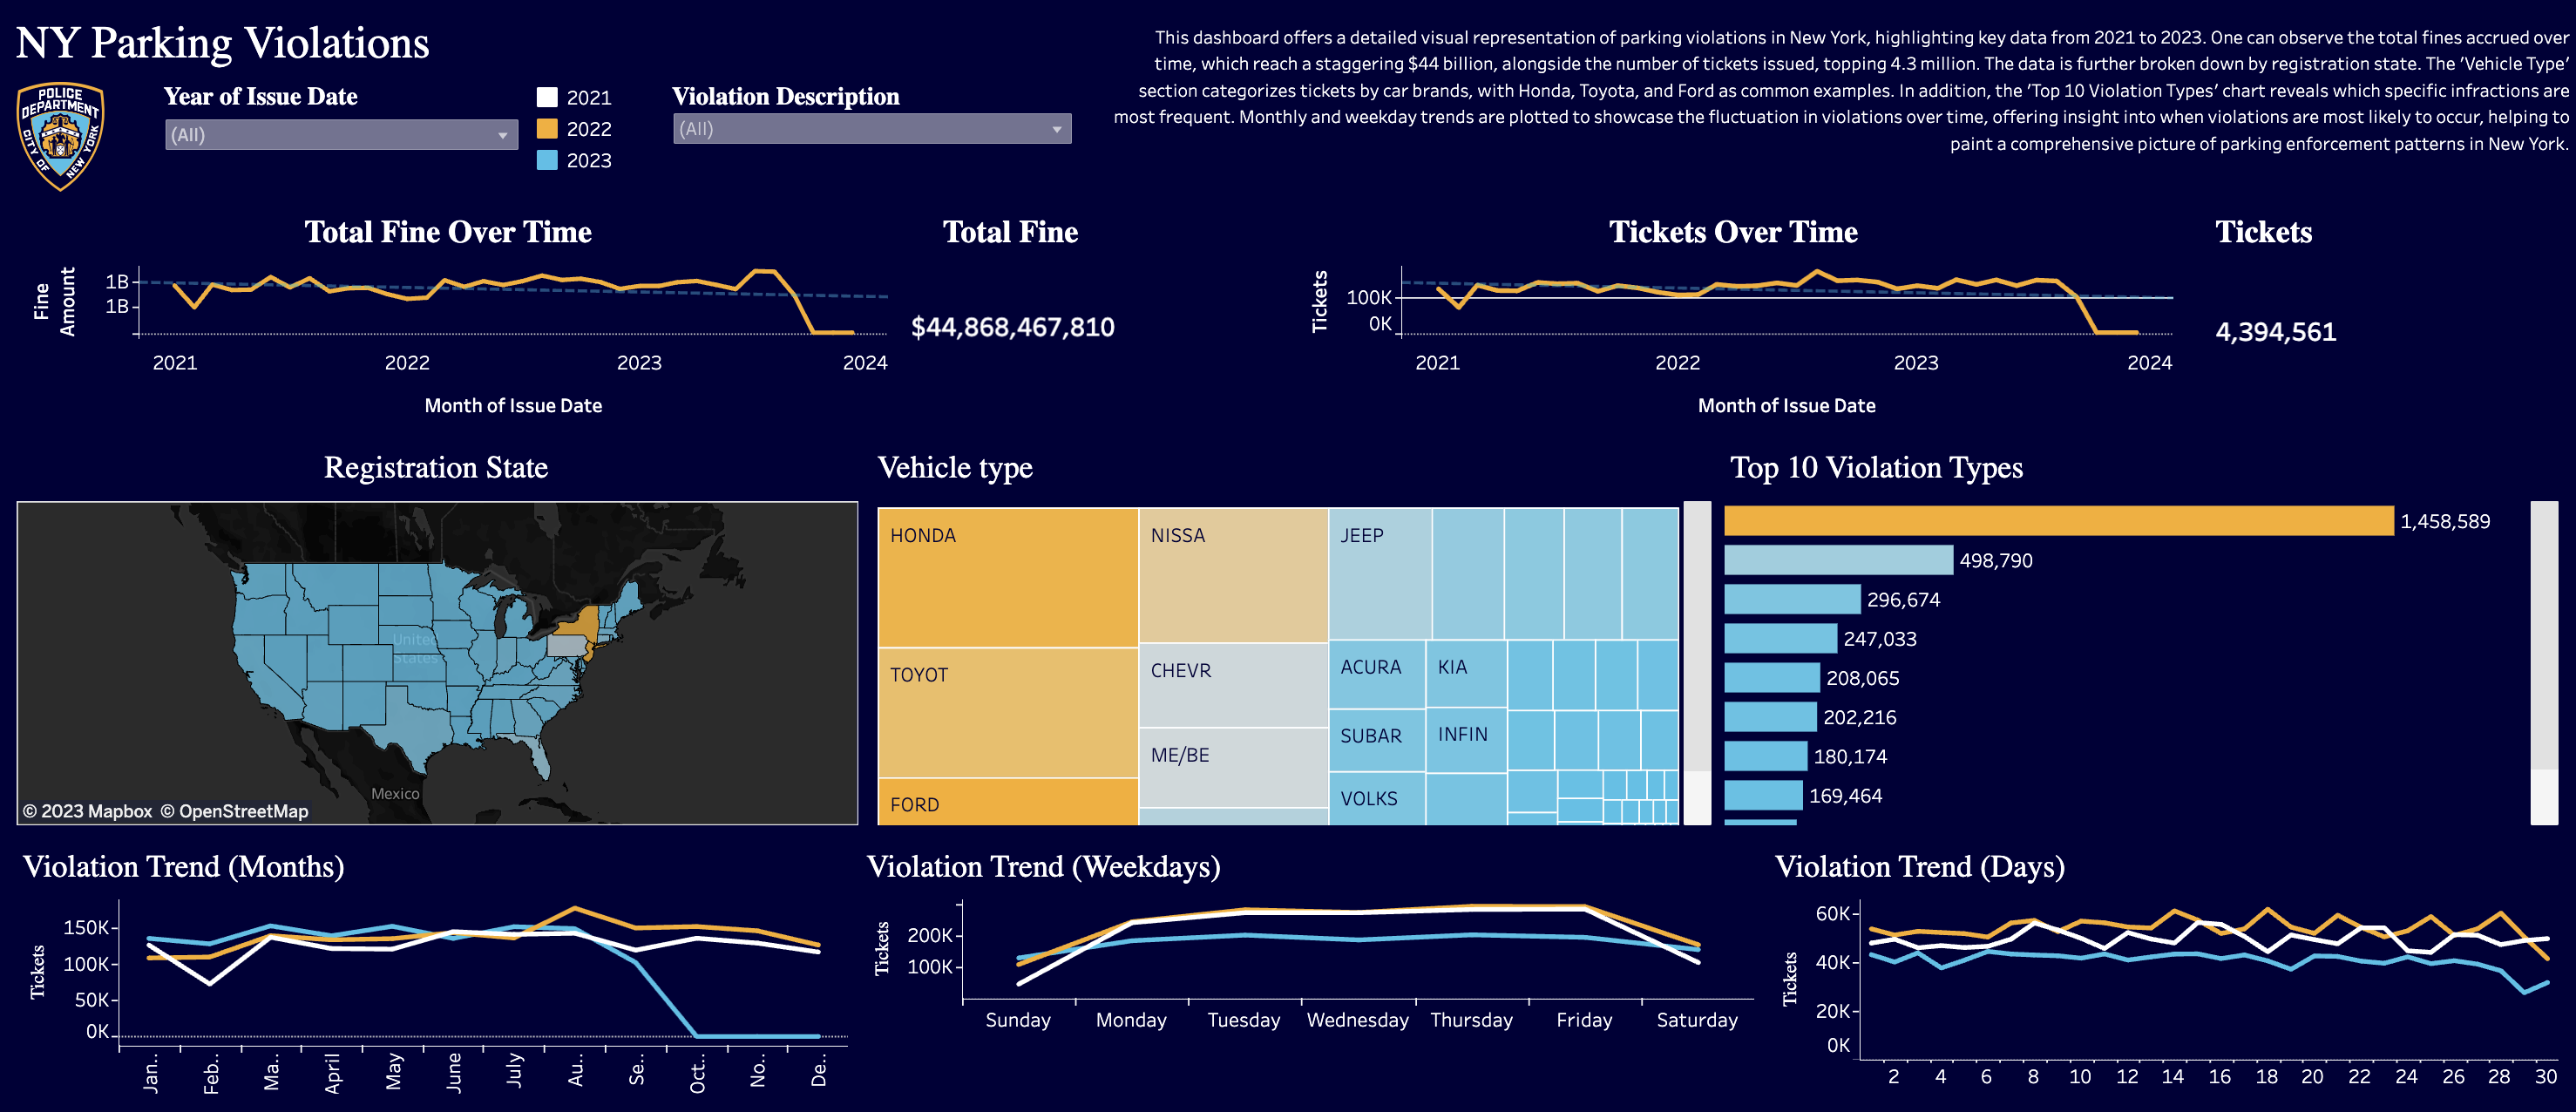

#8. References
https://www.nyc.gov/site/finance/vehicles/services-violation-codes.page

https://www.nytimes.com/2023/10/09/nyregion/nyc-parking-cars.html

## Use of Gen-AI

We used ChatGPT to seek advice on conceptual understanding, such as clarifying definitions related to violation code descriptions, to better understand the possible behaviors and reasons behind parking violations. Prompts as follows:


1.   Violation Code 32 - "OT PARKING-MISSING/BROKEN METR":
Other parking violation related to missing or broken meters.
2.   Violation Code 34 - "EXPIRED METER":
Parking violation for exceeding the allowed time at a meter.
1.   Violation Code 35 - "SELLING/OFFERING MCHNDSE-METER":
Violation related to selling or offering merchandise at a parking meter.
2.   Violation Code 37 - "EXPIRED MUNI METER":
Parking violation for exceeding the allowed time at a municipal meter.
1.   Violation Code 38 - "FAIL TO DSPLY MUNI METER RECPT":
Failure to display a municipal meter receipt.

... (along with other 92 code of explanations)

These explanations provide an overview of the nature of each parking violation based on the corresponding Violation Code and Description.

We also sought help for only returning distinct value for each partition of our Windows clause in 4.1.b, prompt as follow:<br>
 [screenshot of code] My code is working fine but return all the value rather than distinct ones, I don't want to view the same value over and over, how can I aggregate them and show only once?